In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from SNARS import Snars

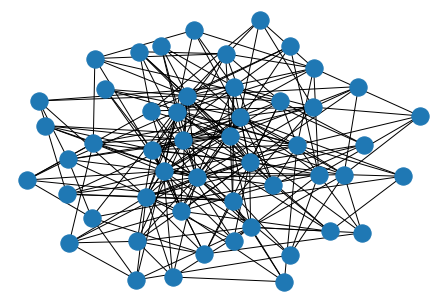

In [2]:
class BA:
    def __init__(self, N, m, p, model=None):
        self.m = m
        self.N = N
        self.model = model
        self.p = p
        self.G = nx.complete_graph(p)
    def add_node(self):
        new_node = max(self.G.nodes) + 1
        if self.model=='A':
            probabilities = [1/len(self.G.nodes)]*len(self.G.nodes)
        else:
            probabilities = np.array(Snars(self.G).degree_list) / sum(Snars(self.G).degree_list)
        new_edges = choice(self.G.nodes, size=self.m, replace=False, p=probabilities)
        self.G.add_node(new_node)
        for j in new_edges:
            self.G.add_edge(new_node, j)
    def generate(self):
        while len(self.G.nodes)<= self.N:
            self.add_node()
    def reset(self):
        self.G = nx.complete_graph(self.p)
        
BA_ = BA(50, 5, 5)
BA_.generate()
nx.draw_kamada_kawai(BA_.G)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


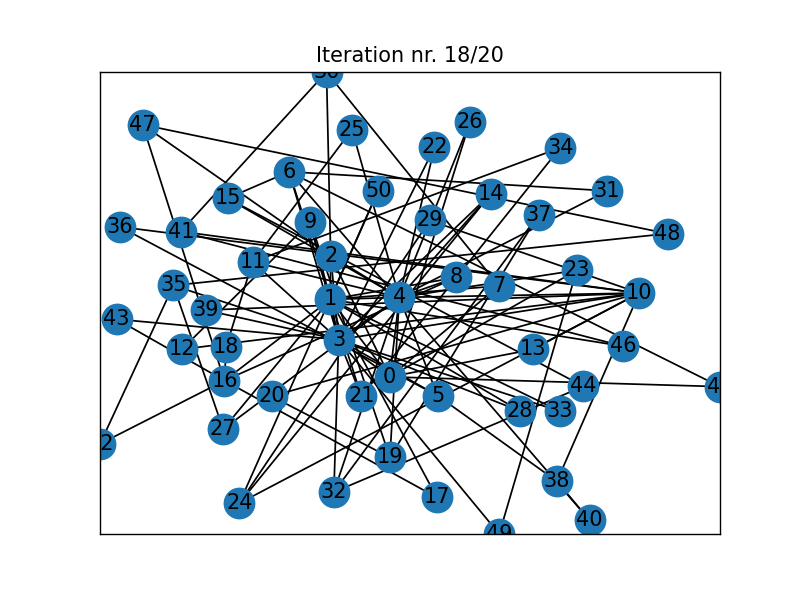

In [8]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()

BA_ = BA(50, 2, 5)
BA_.generate()
pos = nx.kamada_kawai_layout(BA_.G)

def init():
    ax.clear()
    BA_.reset()
    nx.draw_networkx(BA_.G, pos, ax=ax)
    ax.set_ylim(min([p[1] for p in pos.values()]), max([p[1] for p in pos.values()]))
    ax.set_xlim(min([p[0] for p in pos.values()]), max([p[0] for p in pos.values()]))
    return ax
    

def update(frame):
    ax.clear()
    BA_.add_node()
    nx.draw_networkx(BA_.G, pos=pos, ax=ax)
    ax.set_title(f"Iteration nr. {round(frame)}/20")
    ax.set_ylim(min([p[1] for p in pos.values()]), max([p[1] for p in pos.values()]))
    ax.set_xlim(min([p[0] for p in pos.values()]), max([p[0] for p in pos.values()]))
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, 20), interval=1000, init_func=init)

<BarContainer object of 10 artists>

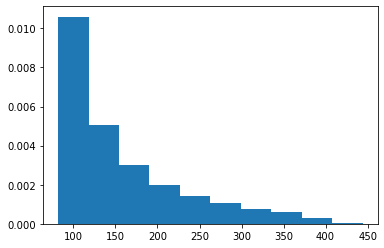

In [3]:
BA_ = BA(1000, 100, 100)
BA_.generate()
deg = Snars(BA_.G).degree_list
freq, bins= np.histogram(deg, density=True)
BA_.reset()
freq *=0
while len(BA_.G.nodes)<BA_.N:
    BA_.add_node()
    deg = Snars(BA_.G).degree_list
    freq+= np.histogram(deg, density=True, bins=bins)[0]/BA_.N

fig, ax = plt.subplots()
ax.bar(bins[:-1], freq, width=bins[1]-bins[0])

In [4]:

Snars(BA_.G).mle()

1.1945953239511555

In [5]:
Snars(BA_.G).est_alpha_lin_regression()

(array([[-0.22130337]]), array([103.9182184]))

{1: [], 100: [], 200: [], 300: [], 400: [], 500: [], 600: [], 700: [], 800: [], 900: [], 1000: []}


Text(0, 0.5, 'Node degree')

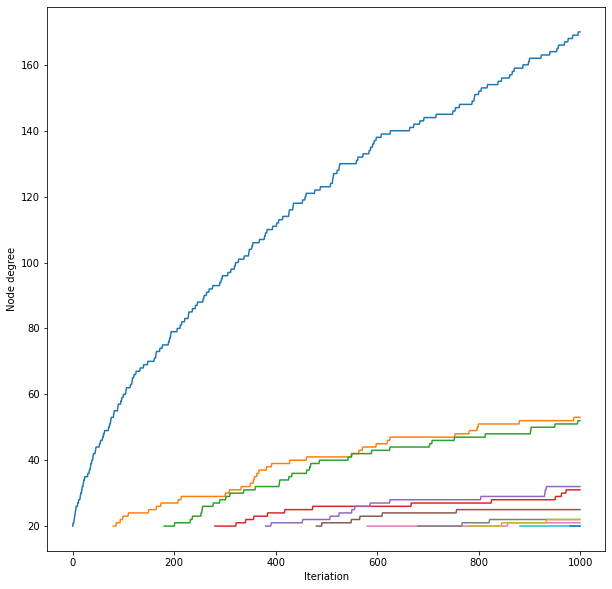

In [6]:
BA_ = BA(1000, 20, 20)
k=dict(zip(map(int, np.linspace(1, BA_.N, 11)), [[]]*11))
print(k)
for i in range(BA_.N):
    BA_.add_node()
    for node in k:
        deg = dict(BA_.G.degree).get(node)
        k[node] = k[node] + [deg]

fig, ax = plt.subplots(figsize=(10,10))
for key in k:
    ax.plot(k[key])
ax.set_xlabel('Iteriation')
ax.set_ylabel('Node degree')